In [329]:
import pandas as pd
import numpy as np
import seaborn as sns


- Load the data :

In [330]:
housing=pd.read_csv('/kaggle/input/new-york-housing-market/NY-House-Dataset.csv')
housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [331]:
housing.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4801 entries, 0 to 4800

Data columns (total 17 columns):

 #   Column                       Non-Null Count  Dtype  

---  ------                       --------------  -----  

 0   BROKERTITLE                  4801 non-null   object 

 1   TYPE                         4801 non-null   object 

 2   PRICE                        4801 non-null   int64  

 3   BEDS                         4801 non-null   int64  

 4   BATH                         4801 non-null   float64

 5   PROPERTYSQFT                 4801 non-null   float64

 6   ADDRESS                      4801 non-null   object 

 7   STATE                        4801 non-null   object 

 8   MAIN_ADDRESS                 4801 non-null   object 

 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 

 10  LOCALITY                     4801 non-null   object 

 11  SUBLOCALITY                  4801 non-null   object 

 12  STREET_NAME                  4801 non-null   object 

 13  

- Unneeded columns , I will drop them:

In [332]:
housing.drop(columns=['BROKERTITLE','MAIN_ADDRESS','FORMATTED_ADDRESS'],inplace=True)
housing.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",United States,New York,New York County,New York,West 57th Street,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065",United States,New York,New York County,New York,East 64th Street,40.767224,-73.969856


- check the null values in all columns:

In [333]:
housing.isnull().sum()

TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

- check the duplicated values in all columns :

In [334]:
housing.duplicated().sum()

214

- Drop all duplicated values in the cloumns:

In [335]:
housing.drop_duplicates(inplace=True)

- check again:

In [336]:
housing.duplicated().sum()

0

In [337]:
housing.info()

<class 'pandas.core.frame.DataFrame'>

Index: 4587 entries, 0 to 4800

Data columns (total 14 columns):

 #   Column                       Non-Null Count  Dtype  

---  ------                       --------------  -----  

 0   TYPE                         4587 non-null   object 

 1   PRICE                        4587 non-null   int64  

 2   BEDS                         4587 non-null   int64  

 3   BATH                         4587 non-null   float64

 4   PROPERTYSQFT                 4587 non-null   float64

 5   ADDRESS                      4587 non-null   object 

 6   STATE                        4587 non-null   object 

 7   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 

 8   LOCALITY                     4587 non-null   object 

 9   SUBLOCALITY                  4587 non-null   object 

 10  STREET_NAME                  4587 non-null   object 

 11  LONG_NAME                    4587 non-null   object 

 12  LATITUDE                     4587 non-null   float64

 13  LONGI

In [338]:
housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


- plot the bar plot for the TYPE column to show the categorical values and show the distribution for each category:

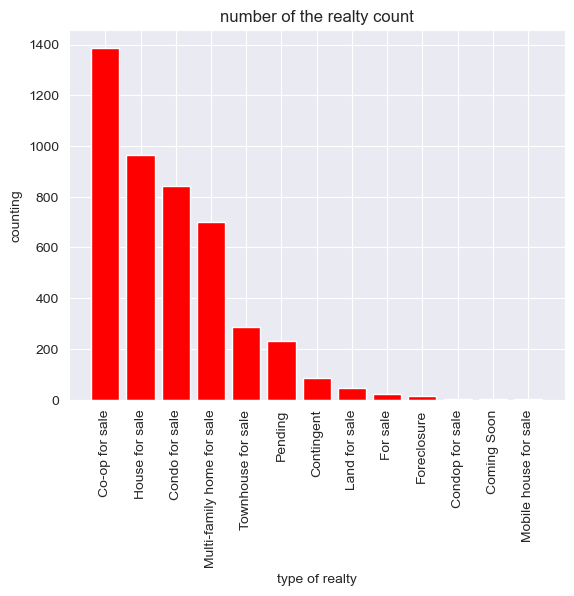

In [339]:
import matplotlib.pyplot as plt
counter=housing['TYPE'].value_counts()
plt.bar(counter.index,counter,color='red')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('type of realty')
plt.ylabel('counting')
plt.title('number of the realty count')

# Show the plot
plt.show()

- At the above plot we can find the most of our types for sale are  co-op,houses,multi_family house,condo and pending : 

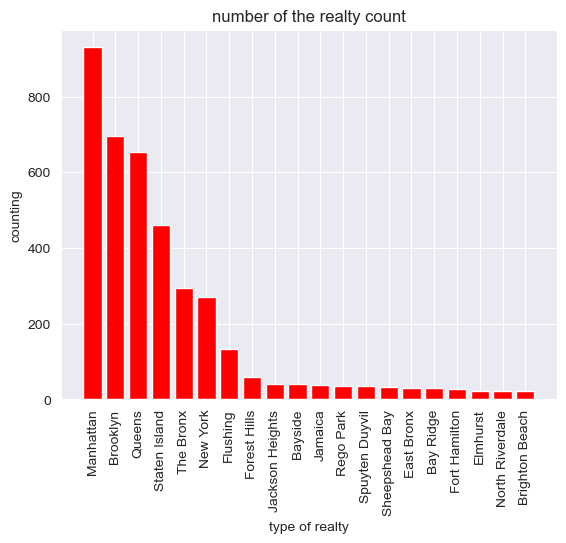

In [340]:
import matplotlib.pyplot as plt
counter=housing['STREET_NAME'].value_counts()
plt.bar(counter.index[:20],counter[:20],color='red')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('type of realty')
plt.ylabel('counting')
plt.title('number of the realty count')

# Show the plot
plt.show()

In [341]:
counter=housing['STREET_NAME'].value_counts()
counter

STREET_NAME
Manhattan           930
Brooklyn            696
Queens              655
Staten Island       461
The Bronx           294
                   ... 
Rector Place          1
Centre Street         1
East 96th Street      1
35th Avenue           1
Mount Eden            1
Name: count, Length: 174, dtype: int64

- At the above plot the streets have more than 600 realities for sale are Manhattan,Brooklyn,Queens.
- ThE streets have less than 100 and more than 40 realities for sale are Forest Hills and New York.
- others categories in the plot and display clearly in the plot.

In [342]:
# Calculate skewness for each column
for column in housing.select_dtypes(include=[np.number]).columns:
    skewness_per_column = housing[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 65.35481192348358

Skewness for BEDS: 5.495813321650833

Skewness for BATH: 7.82905243382857

Skewness for PROPERTYSQFT: 12.348808100744424

Skewness for LATITUDE: -0.08752198915216305

Skewness for LONGITUDE: -0.3920869876425833


- At the above cell , I compute the skewness for the numeric columns to show the extent of the deviation of the graph for those columns to handle them and remove the outliers of them. 

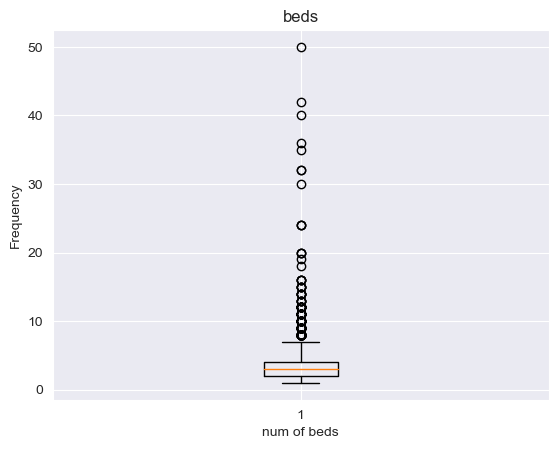

In [343]:
plt.boxplot(housing['BEDS'])

# Add labels and title
plt.xlabel('num of beds')
plt.ylabel('Frequency')
plt.title('beds')

# Show the plot
plt.show()

- The box plot for the beds columns shows us the values above 10 are outliers 

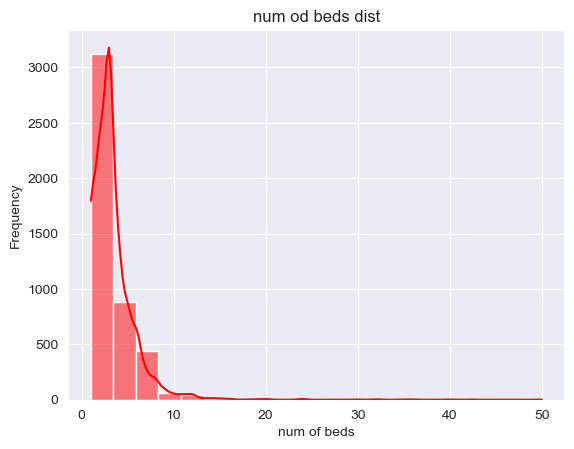

In [344]:
sns.histplot(housing['BEDS'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of beds')
plt.ylabel('Frequency')
plt.title('num od beds dist')

# Show the plot
plt.show()

- we can see the distribution is right skewness,we will handle it
- the mean of the right skewness : mode<medium<mean. 
- the value of computing the Skewness for BEDS: 5.495813321650833

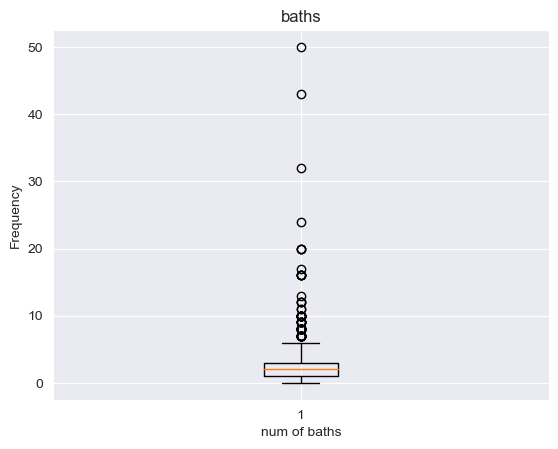

In [345]:
plt.boxplot(housing['BATH'])

# Add labels and title
plt.xlabel('num of baths')
plt.ylabel('Frequency')
plt.title('baths')

# Show the plot
plt.show()

- the box plot of baths show us the values above 10 baths are outliers,we will compute the IQR of it for remove or reduction them.

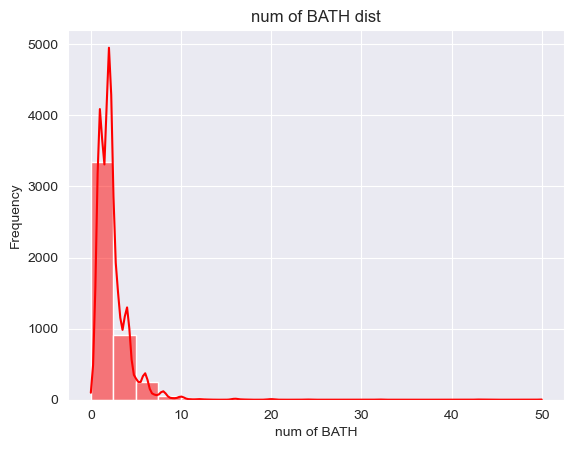

In [346]:
sns.histplot(housing['BATH'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of BATH')
plt.ylabel('Frequency')
plt.title('num of BATH dist')

# Show the plot
plt.show()

- th above plot show us the baths column is right skewness , we will handle it.
- the value of computing the Skewness for BATH: 7.82905243382857.

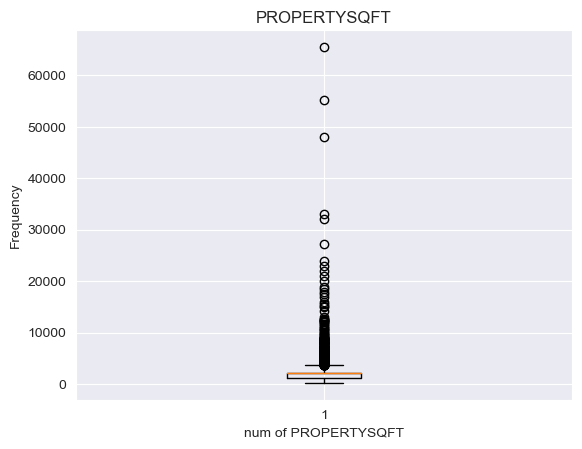

In [347]:
plt.boxplot(housing['PROPERTYSQFT'])

# Add labels and title
plt.xlabel('num of PROPERTYSQFT')
plt.ylabel('Frequency')
plt.title('PROPERTYSQFT')

# Show the plot
plt.show()

- the box plot of PROPERTYSQFT show us the values above 5000 baths are outliers,we will compute the IQR of it for remove or reduction them.

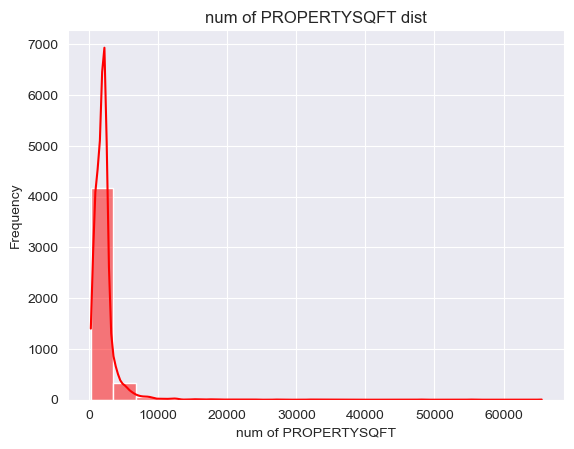

In [348]:
sns.histplot(housing['PROPERTYSQFT'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of PROPERTYSQFT')
plt.ylabel('Frequency')
plt.title('num of PROPERTYSQFT dist')

# Show the plot
plt.show()

- th above plot show us the PROPERTYSQFT column is right skewness , we will handle it.
- the value of computing the Skewness for PROPERTYSQFT: 12.348808100744424

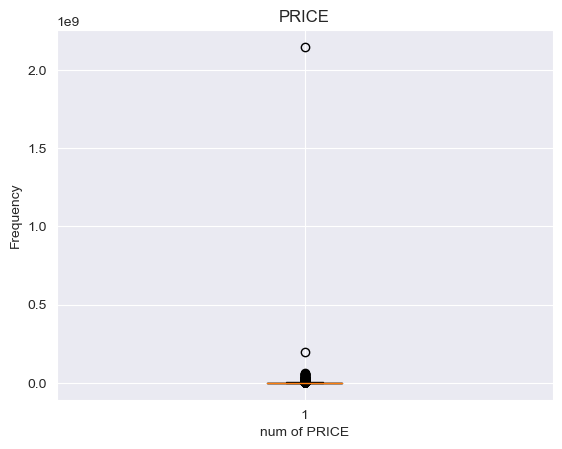

In [349]:
plt.boxplot(housing['PRICE'])

# Add labels and title
plt.xlabel('num of PRICE')
plt.ylabel('Frequency')
plt.title('PRICE')

# Show the plot
plt.show()

- At this box plot we can't show anything ,we have many outliers , we should handle them.

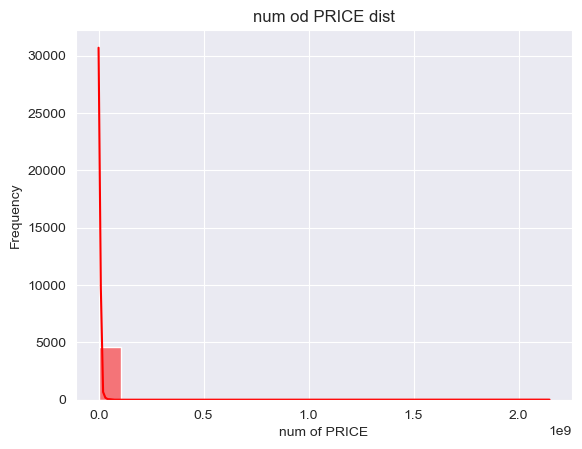

In [350]:
sns.histplot(housing['PRICE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of PRICE')
plt.ylabel('Frequency')
plt.title('num od PRICE dist')

# Show the plot
plt.show()

- th above plot show us the PRICE column is right skewness , we will handle it.
- the value of computing the Skewness for PRICE: 65.35481192348358

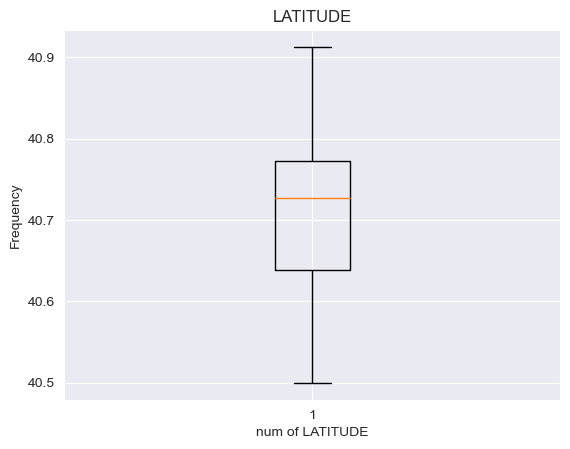

In [351]:
plt.boxplot(housing['LATITUDE'])

# Add labels and title
plt.xlabel('num of LATITUDE')
plt.ylabel('Frequency')
plt.title('LATITUDE')

# Show the plot
plt.show()

- we can see this box plot is fine,we don't have outliers,that's so good.

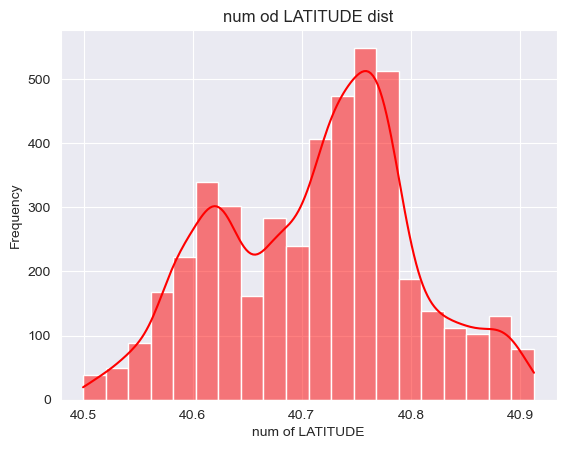

In [352]:
sns.histplot(housing['LATITUDE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of LATITUDE')
plt.ylabel('Frequency')
plt.title('num od LATITUDE dist')

# Show the plot
plt.show()

- th above plot show us the baths column is left skewness , we will handle it.
- the value of computing the Skewness for LATITUDE: -0.08752198915216305.
- this is very small not affect in the analysis,we will try to reduce it.

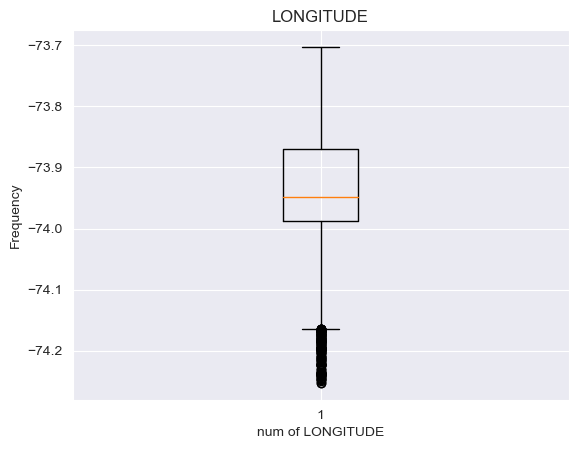

In [353]:
plt.boxplot(housing['LONGITUDE'])

# Add labels and title
plt.xlabel('num of LONGITUDE')
plt.ylabel('Frequency')
plt.title('LONGITUDE')

# Show the plot
plt.show()

- the box plot of LONGITUDE show us the values under -74.05 LONGITUDE are outliers,we will compute the IQR of it for remove or reduction them.

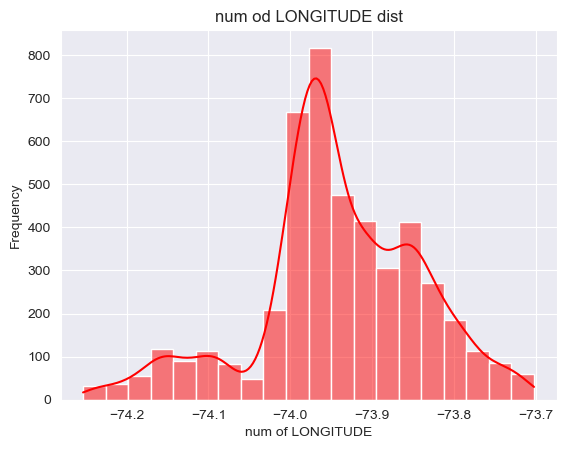

In [354]:
sns.histplot(housing['LONGITUDE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of LONGITUDE')
plt.ylabel('Frequency')
plt.title('num od LONGITUDE dist')

# Show the plot
plt.show()

- th above plot show us the baths column is left skewness , we will handle it.
- the value of computing the Skewness for LONGITUDE: -0.3920869876425833
- this is very small not affect in the analysis,we will try to reduce it

- we take the numeric columns in the another data frame to compute the IQR for each column then remove or reduce the outliers

In [355]:
filter_data=housing.iloc[:,[1,2,3,4,12,13]]
filter_data

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.000000,40.761255,-73.974483
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991
2,260000,4,2.000000,2015.000000,40.541805,-74.196109
3,69000,3,1.000000,445.000000,40.761398,-73.974613
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856
...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,40.774350,-73.955879
4797,245000,1,1.000000,2184.207862,40.732538,-73.860152
4798,1275000,1,1.000000,2184.207862,40.745882,-74.003398
4799,598125,2,1.000000,655.000000,40.742770,-73.872752


In [356]:
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    housing[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

In [357]:
housing.info()

<class 'pandas.core.frame.DataFrame'>

Index: 4587 entries, 0 to 4800

Data columns (total 14 columns):

 #   Column                       Non-Null Count  Dtype  

---  ------                       --------------  -----  

 0   TYPE                         4587 non-null   object 

 1   PRICE                        4059 non-null   float64

 2   BEDS                         4369 non-null   float64

 3   BATH                         4479 non-null   float64

 4   PROPERTYSQFT                 4213 non-null   float64

 5   ADDRESS                      4587 non-null   object 

 6   STATE                        4587 non-null   object 

 7   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 

 8   LOCALITY                     4587 non-null   object 

 9   SUBLOCALITY                  4587 non-null   object 

 10  STREET_NAME                  4587 non-null   object 

 11  LONG_NAME                    4587 non-null   object 

 12  LATITUDE                     4587 non-null   float64

 13  LONGI

In [358]:
housing.isna().sum()

TYPE                             0
PRICE                          528
BEDS                           218
BATH                           108
PROPERTYSQFT                   374
ADDRESS                          0
STATE                            0
ADMINISTRATIVE_AREA_LEVEL_2      0
LOCALITY                         0
SUBLOCALITY                      0
STREET_NAME                      0
LONG_NAME                        0
LATITUDE                         0
LONGITUDE                      145
dtype: int64

In [359]:
housing.dropna(inplace=True)

In [360]:
housing.isna().sum()

TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

# Calculate skewness for each column after compute the IQR for each column:

In [361]:

for column in housing.select_dtypes(include=[np.number]).columns:
    skewness_per_column = housing[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 1.3595705100222184

Skewness for BEDS: 0.8089954398444785

Skewness for BATH: 1.2791958127811374

Skewness for PROPERTYSQFT: -0.05623864972278096

Skewness for LATITUDE: 0.07395094609024593

Skewness for LONGITUDE: -0.20738809206718986


- As we show in the above cell the values of Skewness are reduced ,that's so good for handling.
- successful handling the outliers.

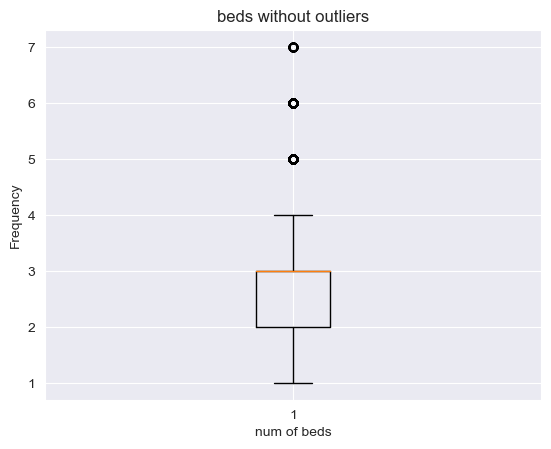

In [362]:
plt.boxplot(housing['BEDS'])
# Add labels and title
plt.xlabel('num of beds')
plt.ylabel('Frequency')
plt.title('beds without outliers')

# Show the plot
plt.show()

- As we show the above plot the number of outliers are less than the previous box plot for the beds columns

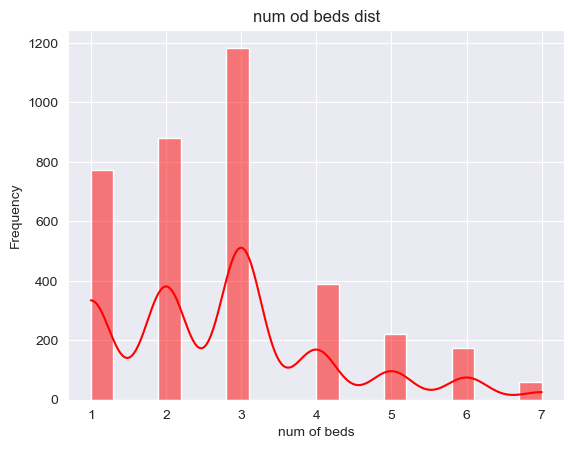

In [363]:
sns.histplot(housing['BEDS'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of beds')
plt.ylabel('Frequency')
plt.title('num od beds dist')

# Show the plot
plt.show()

- Now we can see the plot has value of Skewness for BEDS: 0.8089954398444785.
- those values are very small compare with the previous value for the beds.

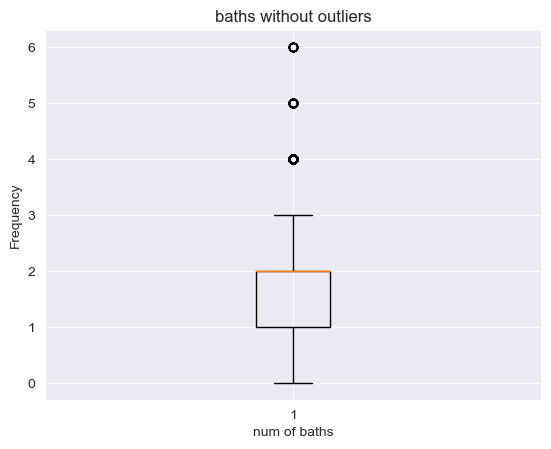

In [364]:
plt.boxplot(housing['BATH'])
# Add labels and title
plt.xlabel('num of baths')
plt.ylabel('Frequency')
plt.title('baths without outliers')

# Show the plot
plt.show()

- As we show the above plot the number of outliers are less than the previous box plot for the baths columns

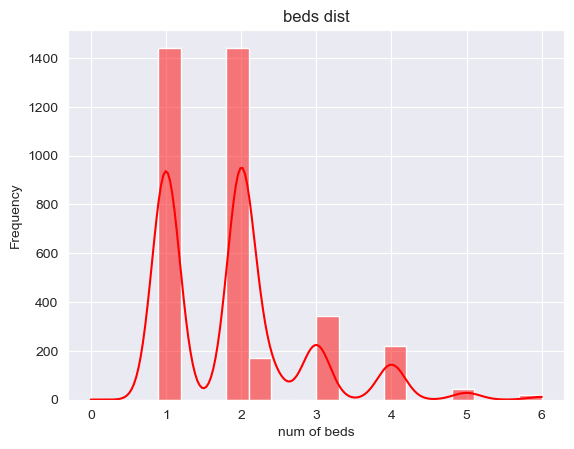

In [365]:
sns.histplot(housing['BATH'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of beds')
plt.ylabel('Frequency')
plt.title('beds dist')

# Show the plot
plt.show()


- Now we can see the plot has value of Skewness for BATH: 1.2791958127811374
- those values are very small compare with the previous value for the beds.

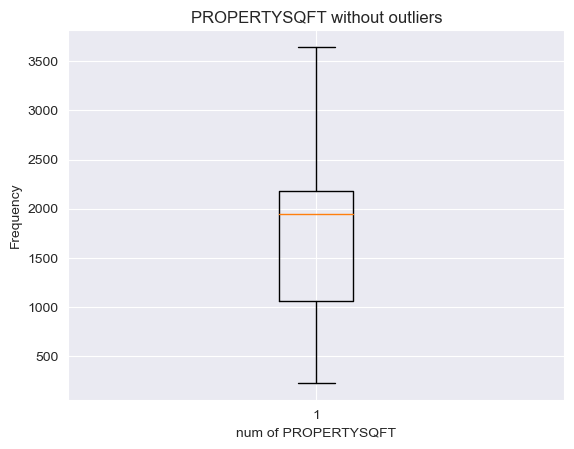

In [366]:
plt.boxplot(housing['PROPERTYSQFT'])
# Add labels and title
plt.xlabel('num of PROPERTYSQFT')
plt.ylabel('Frequency')
plt.title('PROPERTYSQFT without outliers')

# Show the plot
plt.show()

- At the above plot we can see all outliers are removed ,that's good.
- successful handling for that's outliers.

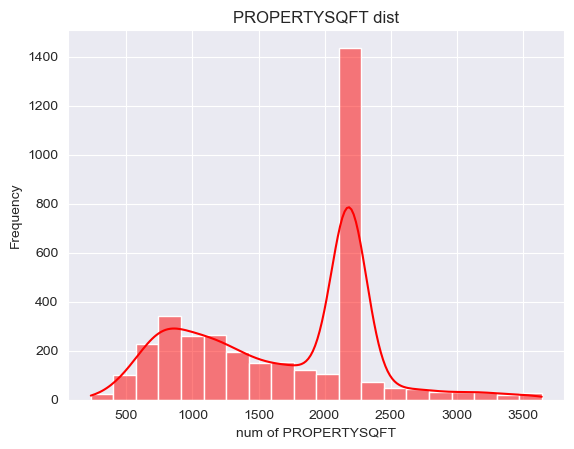

In [367]:

sns.histplot(housing['PROPERTYSQFT'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of PROPERTYSQFT')
plt.ylabel('Frequency')
plt.title('PROPERTYSQFT dist')

# Show the plot
plt.show()

- Now we can see the plot has value of Skewness for PROPERTYSQFT: -0.05623864972278096
- those values are very small compare with the previous value for the PROPERTYSQFT.

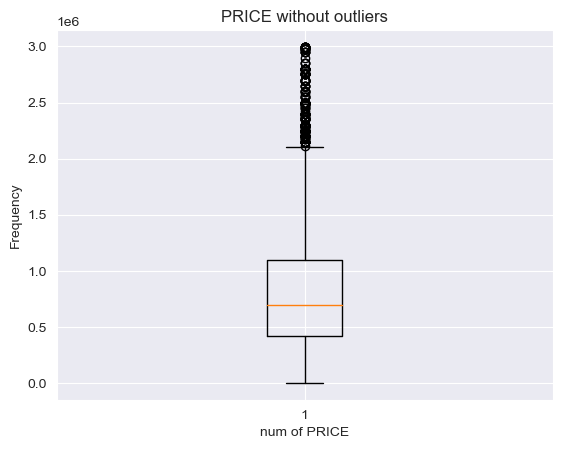

In [368]:
plt.boxplot(housing['PRICE'])
# Add labels and title
plt.xlabel('num of PRICE')
plt.ylabel('Frequency')
plt.title('PRICE without outliers')

# Show the plot
plt.show()

- At this plot now we can show box plot,we reduced the outliers than the previous box plot .
- we succeeded in reduce the number of the outliers. 

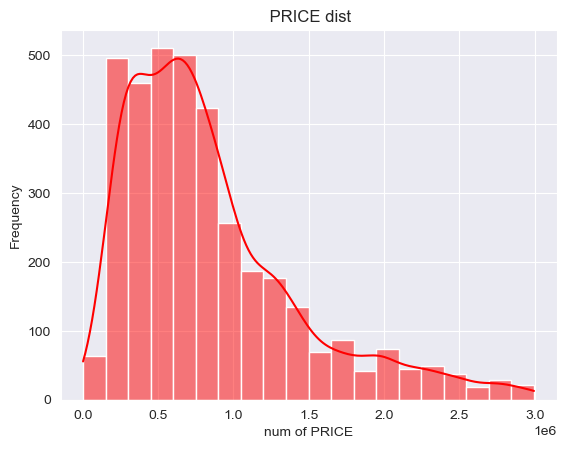

In [369]:
sns.histplot(housing['PRICE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of PRICE')
plt.ylabel('Frequency')
plt.title(' PRICE dist')

# Show the plot
plt.show()

- Now we can see the plot has value of Skewness for PRICE: 1.3595705100222184
- those values are very small compare with the previous value for the PRICE.

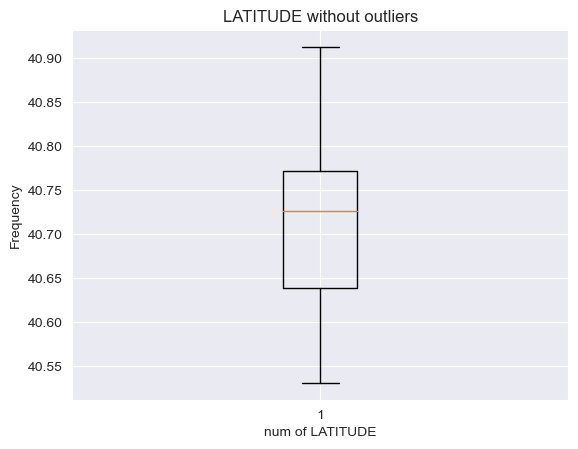

In [370]:
plt.boxplot(housing['LATITUDE'])
# Add labels and title
plt.xlabel('num of LATITUDE')
plt.ylabel('Frequency')
plt.title('LATITUDE without outliers')

# Show the plot
plt.show()

- that is so fine now

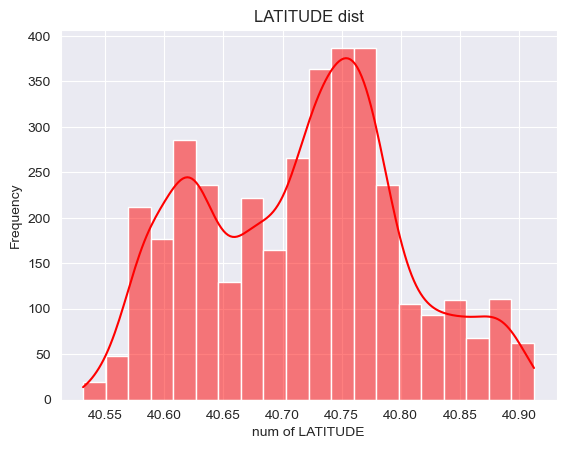

In [371]:

sns.histplot(housing['LATITUDE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of LATITUDE')
plt.ylabel('Frequency')
plt.title('LATITUDE dist')

# Show the plot
plt.show()

- Now we can see the plot has value of Skewness for LATITUDE: 0.07395094609024593
- those values are  small compare with the previous value for the LATITUDE.

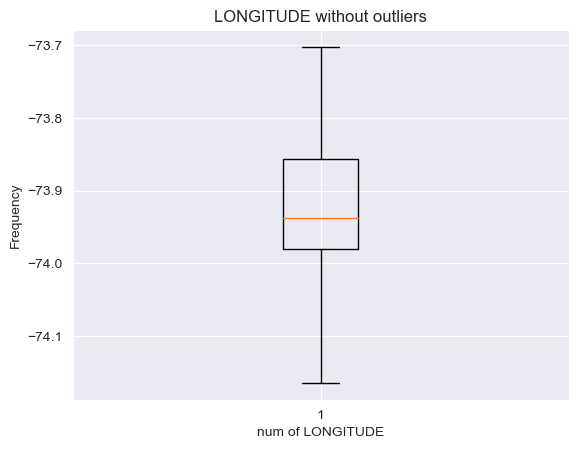

In [372]:
plt.boxplot(housing['LONGITUDE'])
# Add labels and title
plt.xlabel('num of LONGITUDE')
plt.ylabel('Frequency')
plt.title('LONGITUDE without outliers')

# Show the plot
plt.show()

- that is so fine now, we remove all outliers 

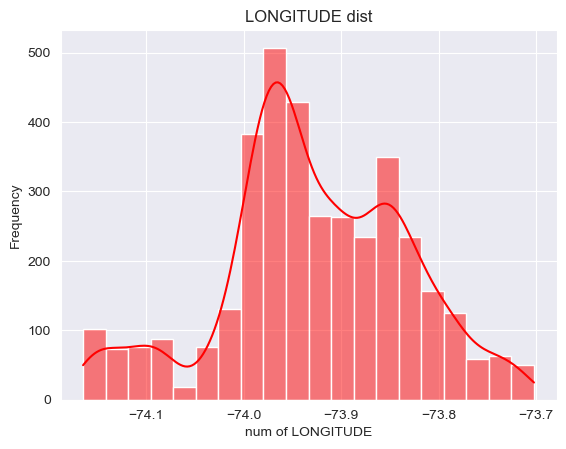

In [373]:

sns.histplot(housing['LONGITUDE'], bins=20, color='red', edgecolor='white',kde=True)

# Add labels and title
plt.xlabel('num of LONGITUDE')
plt.ylabel('Frequency')
plt.title('LONGITUDE dist')

# Show the plot
plt.show()

- Now we can see the plot has value of Skewness for LONGITUDE: -0.20738809206718986
- those values are  small compare with the previous value for the LATITUDE.

In [374]:
housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,8.491667e+05,2.771592,1.893789,1693.288971,40.716504,-73.927382
std,5.846893e+05,1.433381,0.951323,681.921263,0.085671,0.095550
min,2.494000e+03,1.000000,0.000000,230.000000,40.531257,-74.164342
25%,4.190000e+05,2.000000,1.000000,1060.750000,40.639421,-73.980679
50%,6.990000e+05,3.000000,2.000000,1950.000000,40.726843,-73.936958
75%,1.093750e+06,3.000000,2.000000,2184.207862,40.771828,-73.856960
max,2.995000e+06,7.000000,6.000000,3645.000000,40.912729,-73.702450


- this cell give me the all information I need to now about all stat information I need to know.

In [375]:
housing.info()

<class 'pandas.core.frame.DataFrame'>

Index: 3682 entries, 0 to 4800

Data columns (total 14 columns):

 #   Column                       Non-Null Count  Dtype  

---  ------                       --------------  -----  

 0   TYPE                         3682 non-null   object 

 1   PRICE                        3682 non-null   float64

 2   BEDS                         3682 non-null   float64

 3   BATH                         3682 non-null   float64

 4   PROPERTYSQFT                 3682 non-null   float64

 5   ADDRESS                      3682 non-null   object 

 6   STATE                        3682 non-null   object 

 7   ADMINISTRATIVE_AREA_LEVEL_2  3682 non-null   object 

 8   LOCALITY                     3682 non-null   object 

 9   SUBLOCALITY                  3682 non-null   object 

 10  STREET_NAME                  3682 non-null   object 

 11  LONG_NAME                    3682 non-null   object 

 12  LATITUDE                     3682 non-null   float64

 13  LONGI

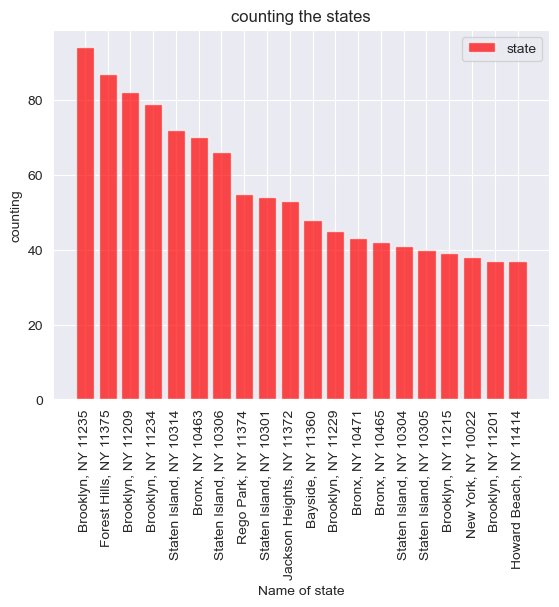

In [376]:
state=housing['STATE'].value_counts()
# Create bar plot
plt.bar(state.index[0:20], state.values[0:20], color='red', alpha=0.7, label='state')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Name of state')
plt.ylabel('counting')
plt.title('counting the states')

# Add legend
plt.legend()

# Display the plot
plt.show()

- At th above plot show us the largest counting values of the state 
- the biggest counting state in the data have 94 numbers of the realities need to sale is  Brooklyn, NY 11235
- the smallest counting state in the data have many numbers of the realities need to sale Ozone Park, NY 11416 and others have one reality need to sale

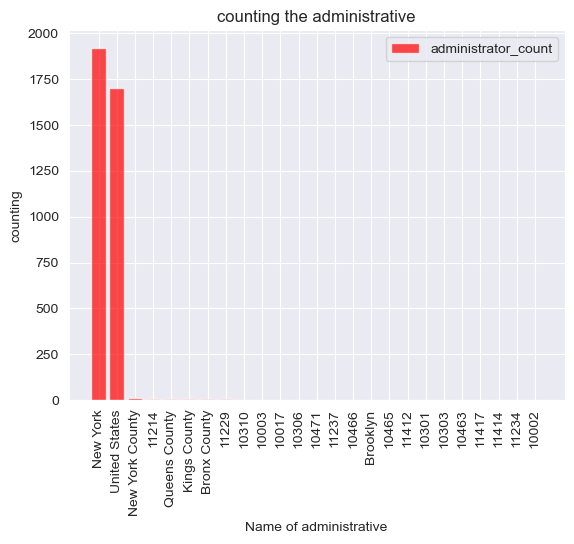

In [377]:
administrator=housing['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts()
plt.bar(administrator.index, administrator.values, color='red', alpha=0.7, label='administrator_count')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Name of administrative')
plt.ylabel('counting')
plt.title('counting the administrative')

# Add legend
plt.legend()

# Display the plot
plt.show()

- the most of the ADMINISTRATIVE_AREA_LEVEL for the realities are New york and Unitedstates.

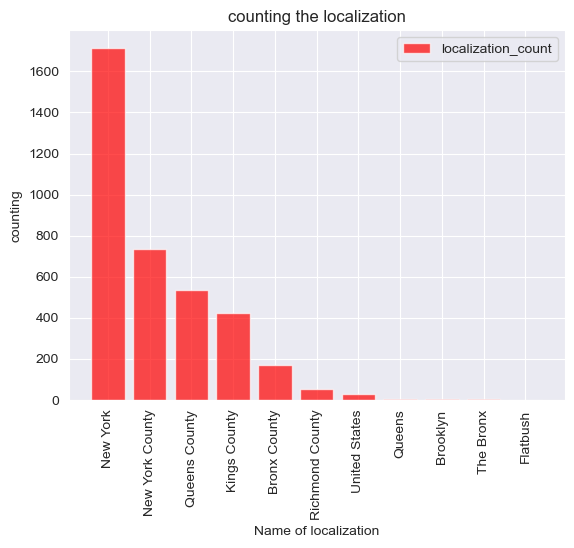

In [378]:
loca=housing['LOCALITY'].value_counts()
plt.bar(loca.index, loca.values, color='red', alpha=0.7, label='localization_count')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Name of localization')
plt.ylabel('counting')
plt.title('counting the localization')

# Add legend
plt.legend()

# Display the plot
plt.show()

- more than 1600  realities for sale the localization of them are New york. 
- lees than 200 realities for sale the localization of them are Flatbush.

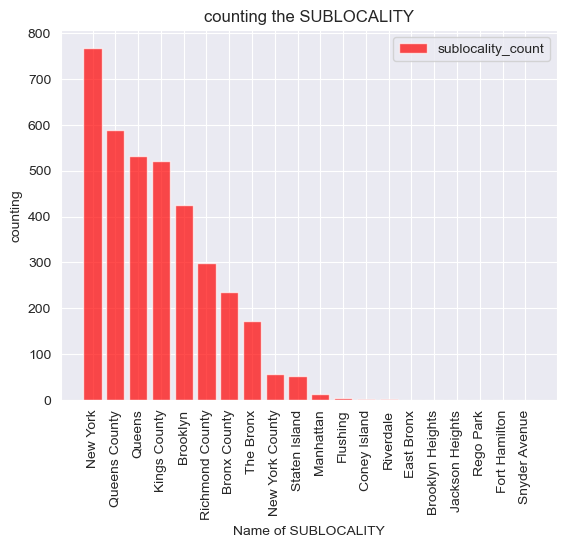

In [379]:
sub_loca=housing['SUBLOCALITY'].value_counts()
plt.bar(sub_loca.index, sub_loca.values, color='red', alpha=0.7, label='sublocality_count')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Name of SUBLOCALITY')
plt.ylabel('counting')
plt.title('counting the SUBLOCALITY')

# Add legend
plt.legend()

# Display the plot
plt.show()

- more than 700  realities for sale the sublocalizaton of them are New york. 
- lees 50 200 realities for sale the sublocalization of them are Snyder avenue.

- #usless columns, I should drop them:

In [380]:
#usless columns, i will dope them:
housing.drop(columns=['ADDRESS','LONG_NAME'],inplace=True)
housing.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000.0,2.0,2.0,1400.000000,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,40.761255,-73.974483
3,Condo for sale,69000.0,3.0,1.0,445.000000,"Manhattan, NY 10022",United States,New York,New York County,New York,40.761398,-73.974613
6,Condo for sale,899500.0,2.0,2.0,2184.207862,"New York, NY 10027",New York,New York County,New York,Manhattan,40.809448,-73.946777
8,Co-op for sale,265000.0,1.0,1.0,750.000000,"Bronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,40.821586,-73.874089
9,Co-op for sale,440000.0,2.0,1.0,978.000000,"Brooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,40.615738,-73.969694


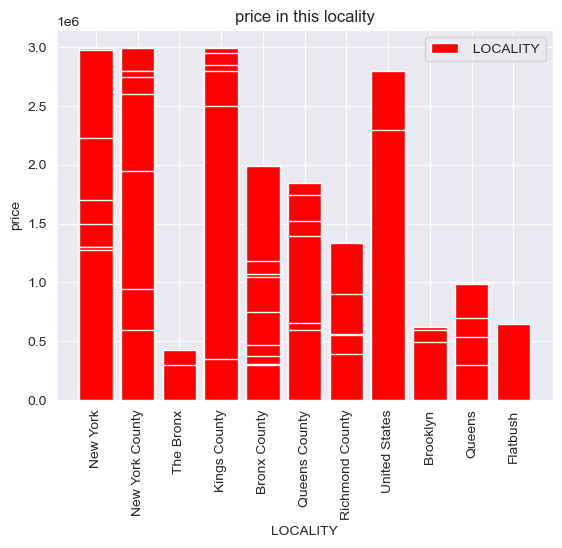

In [381]:
plt.bar(housing.LOCALITY, housing.PRICE, color='red',label=' LOCALITY')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('LOCALITY')
plt.ylabel('price')
plt.title('price in this locality')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the localization and price .
- As we show for example the new york realities the price of them are 3*10^6
- the expensive realities are in New york , New york country and Kings country.
- the cheap realities are in the Bronx

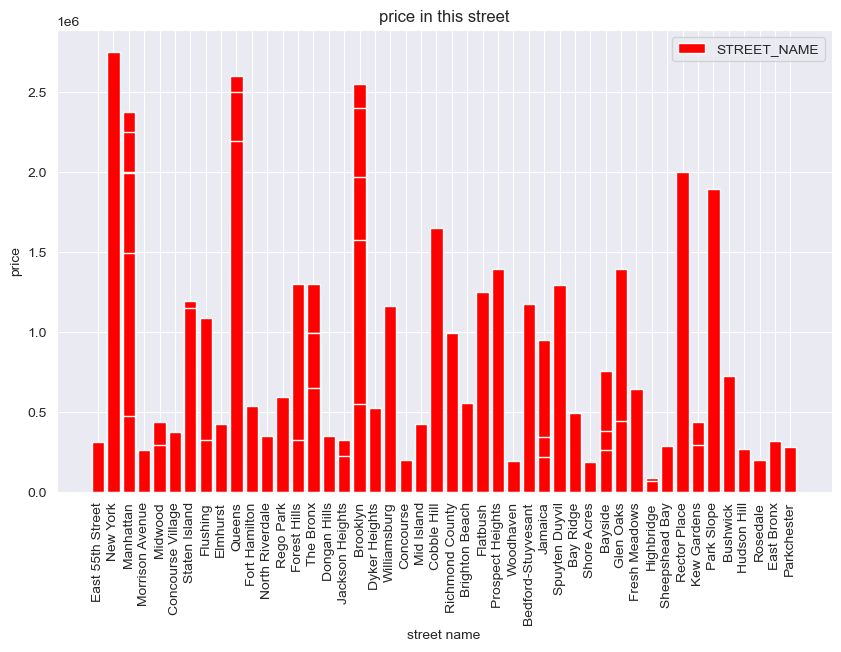

In [382]:
plt.figure(figsize=(10,6))
plt.bar(housing.STREET_NAME[:200], housing.PRICE[:200], color='red',label='STREET_NAME')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('street name')
plt.ylabel('price')
plt.title('price in this street')

# Add legend
plt.legend()

# Display the plot
plt.show()

- take the first 200 values for the name streets and the prices of them.
- the expensive street is New york street.
- the cheapest street is Highbridge.

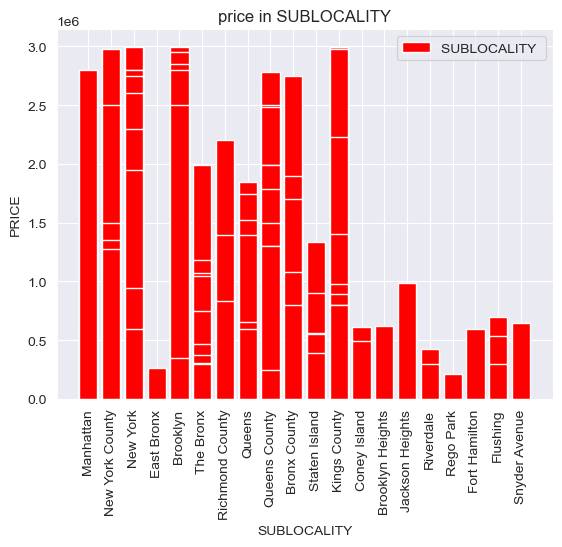

In [383]:
plt.bar(housing.SUBLOCALITY, housing.PRICE, color='red',label='SUBLOCALITY ')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('SUBLOCALITY')
plt.ylabel('PRICE')
plt.title('price in SUBLOCALITY')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the sublocalization and price .
- As we show for example the new york realities the price of them are 3*10^6
- the expensive realities are in New york , New york country,Brooklyn and Kings country.
- the cheap realities are in the Rego park

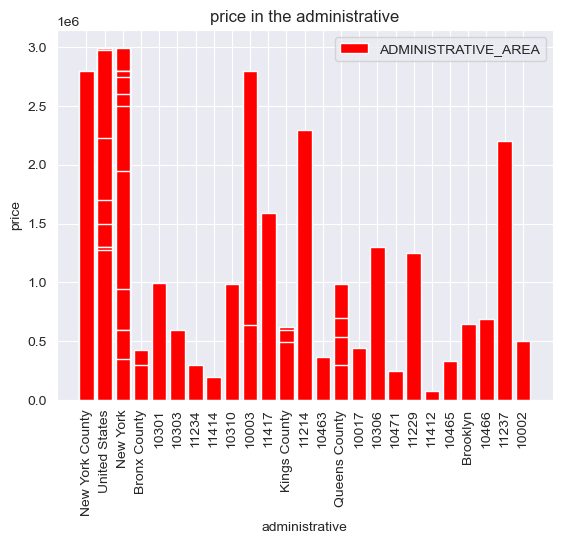

In [384]:
plt.bar(housing.ADMINISTRATIVE_AREA_LEVEL_2, housing.PRICE, color='red',label='ADMINISTRATIVE_AREA')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('administrative')
plt.ylabel('price')
plt.title('price in the administrative')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the ADMINISTRATIVE AREA and price .
- As we show for example the new york realities the price of them are 3*10^6
- the expensive realities are in New york ,Unitedstates.
- the cheap realities are in the 11412.

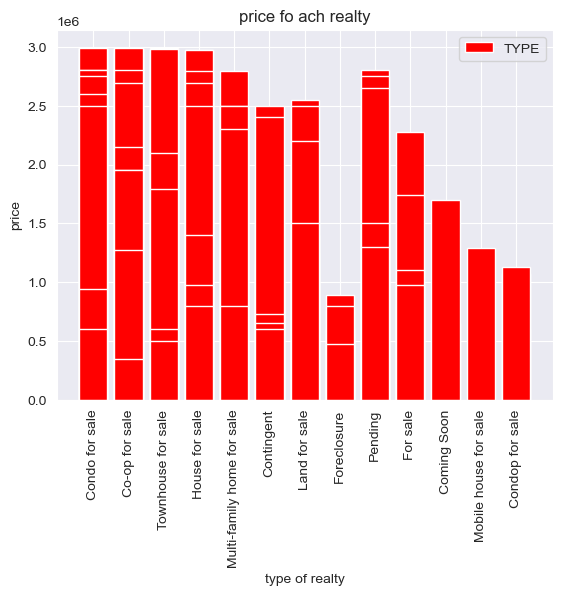

In [385]:
plt.bar(housing.TYPE, housing.PRICE, color='red',label='TYPE')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('type of realty')
plt.ylabel('price')
plt.title('price fo ach realty')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the TYPE of realities and price .
- the expensive realities are condo,co-op,Town house,house are 3*1e6.
- cheapest reality is Foreclosures are 1*1e6.

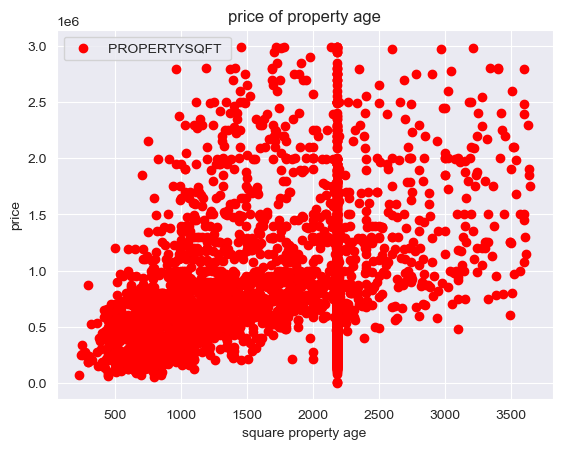

In [386]:
plt.scatter(housing.PROPERTYSQFT, housing.PRICE, color='red',label='PROPERTYSQFT ')

# Add labels and title
plt.xlabel('square property age')
plt.ylabel('price')
plt.title('price of property age')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the PROPERTYSQFT of realities and price .
- if you need reality price less than 1.5*1e6 the PROPERTYSQFT of it should be less than 1000

In [387]:
info=housing.groupby(['TYPE','BATH','BEDS','PRICE']).size().reset_index(name='count')
info

,TYPE,BATH,BEDS,PRICE,count
0,Co-op for sale,1.0,1.0,69000.0,1
1,Co-op for sale,1.0,1.0,90000.0,1
2,Co-op for sale,1.0,1.0,99000.0,3
3,Co-op for sale,1.0,1.0,105509.0,1
4,Co-op for sale,1.0,1.0,109000.0,1
...,...,...,...,...,...
2879,Townhouse for sale,5.0,4.0,1790000.0,1
2880,Townhouse for sale,5.0,5.0,1299999.0,1
2881,Townhouse for sale,6.0,4.0,2995000.0,1
2882,Townhouse for sale,6.0,7.0,1650000.0,1


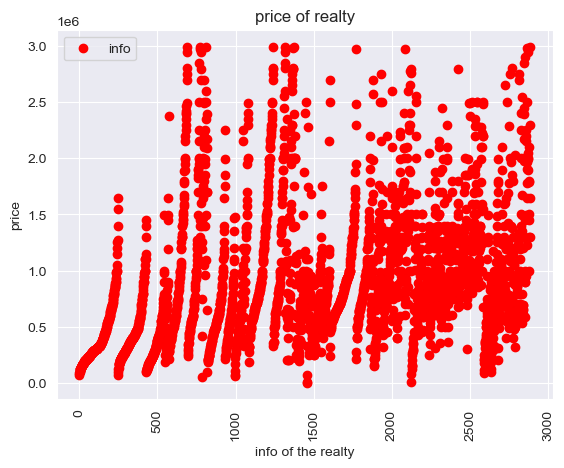

In [388]:
plt.scatter(info.index, info.PRICE, color='red',label='info')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('info of the realty')
plt.ylabel('price')
plt.title('price of realty')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the information of realities like (TYPE,BATH,BEDS) and price .

In [389]:
info_area=housing.groupby(['TYPE','LONGITUDE','LATITUDE','PRICE']).size().reset_index(name='count')
info_area

,TYPE,LONGITUDE,LATITUDE,PRICE,count
0,Co-op for sale,-74.107158,40.618948,225000.0,1
1,Co-op for sale,-74.085270,40.647939,300000.0,1
2,Co-op for sale,-74.084798,40.648149,220500.0,1
3,Co-op for sale,-74.073964,40.638118,375000.0,1
4,Co-op for sale,-74.073964,40.638118,439000.0,1
...,...,...,...,...,...
3667,Townhouse for sale,-73.820977,40.845450,650000.0,1
3668,Townhouse for sale,-73.800190,40.731893,925000.0,1
3669,Townhouse for sale,-73.797790,40.685019,528000.0,1
3670,Townhouse for sale,-73.793404,40.588334,1299999.0,1


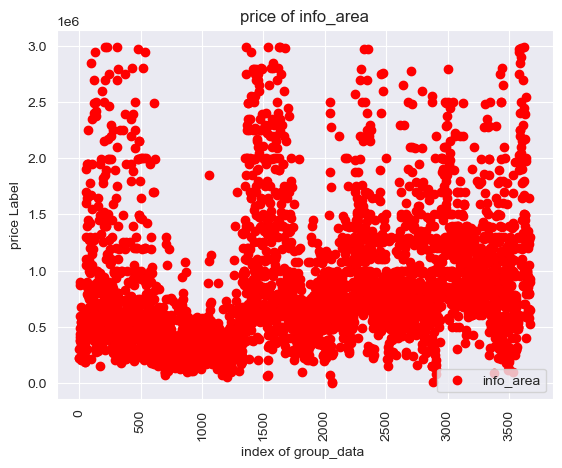

In [390]:
plt.scatter(info_area.index, info_area.PRICE, color='red',label='info_area')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('index of group_data ')
plt.ylabel('price Label')
plt.title('price of info_area')

# Add legend
plt.legend()

# Display the plot
plt.show()

- we can see in the above plot we can see the relation between the information of realities like (TYPE,LONGITUDE,LATITUDE) and price .

In [391]:
correlationn=pd.DataFrame()
for column in housing.select_dtypes(include=[np.number]).columns:
    correlationn[column] = housing[column]
correlationn

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000.0,2.0,2.0,1400.000000,40.761255,-73.974483
3,69000.0,3.0,1.0,445.000000,40.761398,-73.974613
6,899500.0,2.0,2.0,2184.207862,40.809448,-73.946777
8,265000.0,1.0,1.0,750.000000,40.821586,-73.874089
9,440000.0,2.0,1.0,978.000000,40.615738,-73.969694
...,...,...,...,...,...,...
4796,599000.0,1.0,1.0,2184.207862,40.774350,-73.955879
4797,245000.0,1.0,1.0,2184.207862,40.732538,-73.860152
4798,1275000.0,1.0,1.0,2184.207862,40.745882,-74.003398
4799,598125.0,2.0,1.0,655.000000,40.742770,-73.872752


- the correlation values between the columns

In [392]:
relations=correlationn.corr()

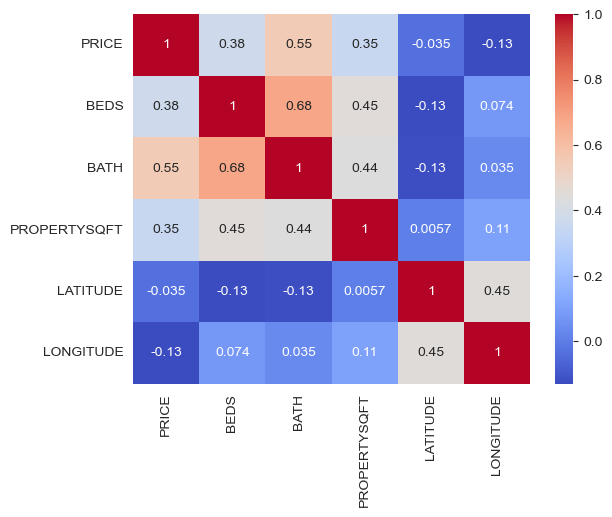

In [393]:
# Use seaborn to create the heatmap
sns.heatmap(relations, annot=True, cmap='coolwarm')
plt.show()

- the correlation values between the columns by heatmap plot.